# Apr 16, 2019
## sound
2018020143 민정원

# 1. 필요한 라이브러리 불러들이기

In [16]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd 
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

# 2. parameter setting

In [17]:
amp = 1         
sr = 10000      
dur = 0.5        
freq = 100.0     

# 3. generate time

In [18]:
t = np.arange(1, sr * dur+1)/sr 

# 4. generate phase

In [19]:
theta = t * 2*np.pi * freq 

# 5. generate signal by cosine-phasor

In [20]:
s = np.sin(theta)

<IPython.core.display.Javascript object>


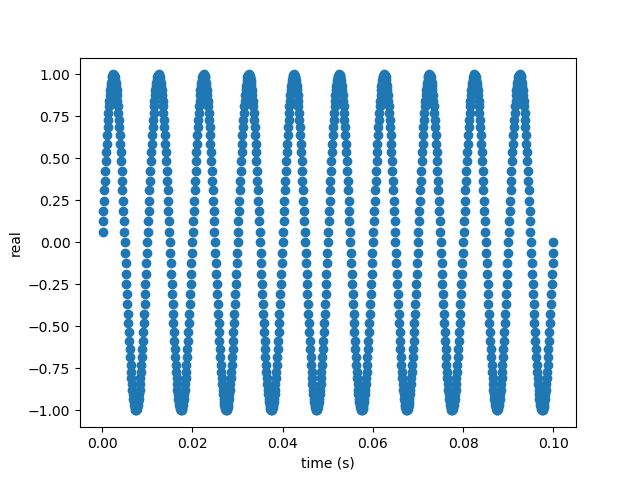

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000], 'o') 
ax.set_xlabel('time (s)') 
ax.set_ylabel('real')
ipd.Audio(s, rate=sr)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000:2], s[0:1000:2], 'o') # 짝수 번째 factor만 그래프에 반영
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

# 6. generate signal by complex-phasor

In [22]:
c = np.exp(theta*1j)

<IPython.core.display.Javascript object>


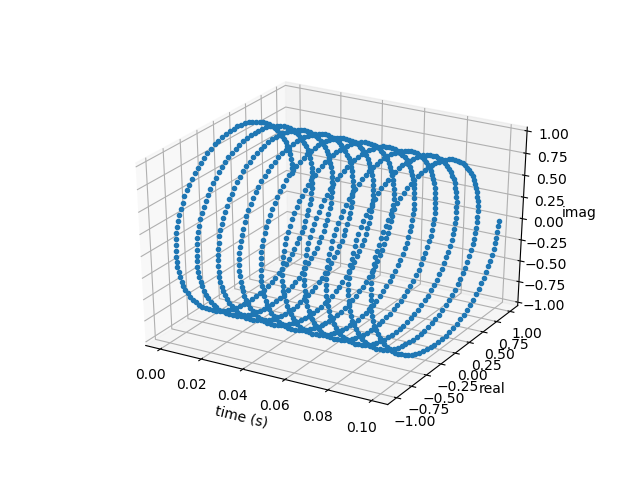

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')
ipd.Audio(s, rate=sr)

# 7. sine함수 plot vs exponential plot
sine의 plot : ax.plot(t[0:200], s[0:200], 'o')   x축 값, y축 값(값 2개)  
e의 plot : ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.')    x축 값, y축 값, z축 값(값 3개)      
c.real : c=a+bi, c에서 실수부분 값, 즉 a값을 받아옴  
c.imag : c=a+bi, c에서 허수부분 값, 즉 b값을 받아옴  

시간이 없이 sine wave를 만들 수 없다(X)
-> 실체로 표현되지 않을 뿐 

# 8. Generate pulse train
소리는 각기 다양한 sine wave의 합으로 구성되어 있음  
다양한 sine wave만들기 : amp, freq를 달리 하기(다른 소리를 만드는 일은 sr, dur와는 관계 없음)  
signal : signal이라고 하는 순간 time 개념 추가됨, 다른 이름 두 가지(time series) ex. 주식시장, 일기예보, 전파,....etc.  

<IPython.core.display.Javascript object>


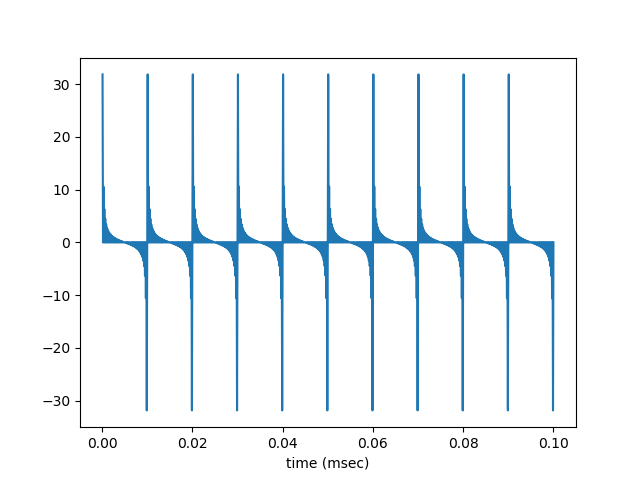

In [15]:
# generate samples, note conversion to float32 array
F0 = 100; Fend = int(sr/2); 
s = np.zeros(len(t));
# F : freq, sr/2=10,000/2=5,000, F0 = 100:1초에 100번 움직이는 sine wave
for freq in range(F0, Fend+1, F0):
#(100부터 5,000까지 100의 간격으로)
#+1로 인해 loop이 50번 돈다, +1없으면 loop은 49번
    theta = t * 2*np.pi * freq
    tmp = amp * np.sin(theta)
    s = s + tmp
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000]); 
ax.set_xlabel('time (msec)')
ipd.Audio(s, rate=sr)